# Machine Learning Techniques

## Imports

In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Data Processing  
This section makes sure that the dataset we chose is ready for machine learning algorithms. First we import the downloaded dataset that contains the columns 'index', 'PatientId', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker', 'region', and 'claim'. Then, we'll print general statistics about the dataframe, like column names, now many null values are there for each of the column, count, mean, standard deviation etc.

In [2]:
df = pd.read_csv('./insurance_data.csv',delimiter=',', decimal='.')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


#### Handle missing values
We'll handle missing values by first checking how many missing values there are in each column.

In [4]:
df.isnull().sum() 

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

The columns **age** and **region** include missing values. We will handle those by replacing the age NaN value with the median of the column and the region with the most common one. If the dataset contains extreme values or outliers, using the median (the middle value of a column) it won't be affected by these extreme values.

In [6]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

most_common_region = df['region'].mode()[0]
df['region'].fillna(most_common_region, inplace=True)

## Identify variations between each column

In [7]:
df.nunique()

index            1340
PatientID        1340
age                43
gender              2
bmi               275
bloodpressure      61
diabetic            2
children            6
smoker              2
region              4
claim            1337
dtype: int64

Based on the data presented in the dataset, I chose to try and predict the 'clain' (making it the target variable) using a regression problem.

## Identifying outliers

Outliers can significantly impact the results of data analysis. First, we will box plot the numerical values to visually check out if there are any values that are way too high, or way too low based on the rest of the values.

In [11]:
df.dtypes

index              int64
PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

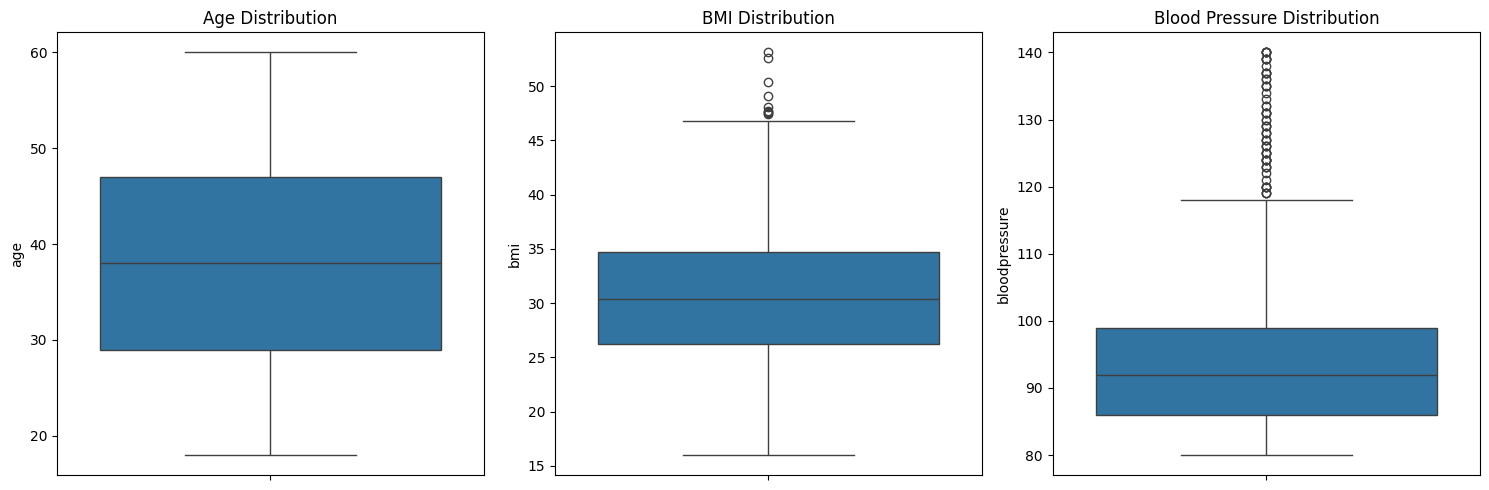

In [12]:
plt.figure(figsize=(15, 5))

# distributions of 'age', 'bmi', and 'bloodpressure'
plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'])
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['bmi'])
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['bloodpressure'])
plt.title('Blood Pressure Distribution')

plt.tight_layout()
plt.show()

1. **Age**: The distribution appears normal with no significant outliers.
2. **BMI**: There are a few outliers on the higher end of the BMI scale.
3. **Blood Pressure**: Some outliers are present, particularly on the lower and higher ends.

## Removing outliers
For this, we will use the Interquartile Range. This means removing values too far from the central quartiles (below the 1st quartile - 1.5 * IQR and above the 3rd quartile + 1.5 * IQR).

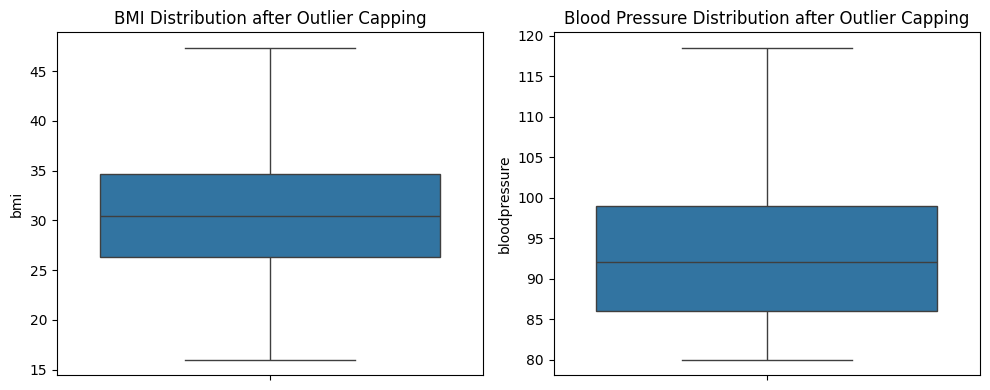

In [13]:
# create a function that removes outliers, so that it can be reused
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)
 
df['bmi'] = cap_outliers(df['bmi'])
df['bloodpressure'] = cap_outliers(df['bloodpressure'])

# checking the distributions after removing the outliers
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['bmi'])
plt.title('BMI Distribution after Outlier Capping')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['bloodpressure'])
plt.title('Blood Pressure Distribution after Outlier Capping')

plt.tight_layout()
plt.show()

## Saving the processed data into a new CSV file for future use

In this notebook I've imported the original insurance_data.csv file and I processed and prepared the data to be suitable for future usage. I identified missing values, handled them, plotted the data to find the outliers and removed them for a more accurate prediction, and so on.

In [15]:
df.to_csv('./Clean_Insurance_Data.csv', index=False) 